Sequential AVL Tree

Reference (Chinese): https://www.cnblogs.com/skywang12345/p/3576969.html

TODO List:
1. fixHeight after ~~rotate~~/~~insert~~ /remove
2. implement remove

In [1]:
from pyAVL import *

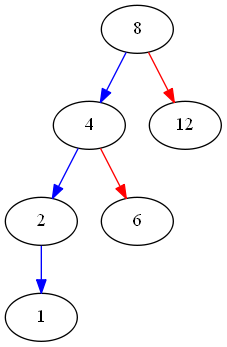

In [2]:
tree = AVL()
tree.put(8, "8")
tree.put(4, "4")
tree.put(12, "12")
tree.put(2, "2")
tree.put(6, "6")
tree.put(1, "1")
tree.print()

# print(strTree(LL_ROOT))
# b = balanceCheck(LL_ROOT)
# print(b.val)
# subroot = rotateLL(LL_ROOT)
# LL_ROOT = getROOT(subroot)
# print(strTree(LL_ROOT))

# prettyPrintTree(LL_ROOT)


In [ ]:
RR_ROOT = Node(8,"8")
putNode(RR_ROOT, 4, "4")
putNode(RR_ROOT, 12, "12")
putNode(RR_ROOT, 10, "10")
putNode(RR_ROOT, 14, "14")
putNode(RR_ROOT, 13, "13")
print(strTree(RR_ROOT))
b = balanceCheck(RR_ROOT)
print(b.val)
subroot = rotateRR(RR_ROOT)
RR_ROOT = getROOT(subroot)
print(strTree(RR_ROOT))

In [ ]:
LR_ROOT = Node(8,"8")
putNode(LR_ROOT, 4, "4")
putNode(LR_ROOT, 12, "12")
putNode(LR_ROOT, 2, "2")
putNode(LR_ROOT, 6, "6")
putNode(LR_ROOT, 5, "5")
print(strTree(LR_ROOT))
b = balanceCheck(LR_ROOT)
print(b.val)
subroot = rotateLR(LR_ROOT)
LR_ROOT = getROOT(subroot)
print(strTree(LR_ROOT))

In [ ]:
RL_ROOT = Node(8,"8")
putNode(RL_ROOT, 4, "4")
putNode(RL_ROOT,12, "12")
putNode(RL_ROOT, 10, "10")
putNode(RL_ROOT, 14, "14")
putNode(RL_ROOT, 9, "9")
print(strTree(RL_ROOT))
b = balanceCheck(RL_ROOT)
print(b.val)
subroot = rotateRL(RL_ROOT)
RL_ROOT = getROOT(subroot)
print(strTree(RL_ROOT))

In [ ]:
# LL
AUTO_ROOT = Node(8,"8")
putNode(AUTO_ROOT, 4, "4")
putNode(AUTO_ROOT, 12, "12")
putNode(AUTO_ROOT, 2, "2")
putNode(AUTO_ROOT, 6, "6")
putNode(AUTO_ROOT, 1, "1")
print(strTree(AUTO_ROOT))
subroot = balanceCheck(AUTO_ROOT)
subroot = rotateCheck(subroot)(subroot)
AUTO_ROOT = getROOT(subroot)
print(strTree(AUTO_ROOT))

In [ ]:
# RR
AUTO_ROOT = Node(8,"8")
putNode(AUTO_ROOT, 4, "4")
putNode(AUTO_ROOT, 12, "12")
putNode(AUTO_ROOT, 10, "10")
putNode(AUTO_ROOT, 14, "14")
putNode(AUTO_ROOT, 13, "13")
print(strTree(AUTO_ROOT))
subroot = balanceCheck(AUTO_ROOT)
subroot = rotateCheck(subroot)(subroot)
AUTO_ROOT = getROOT(subroot)
print(strTree(AUTO_ROOT))

In [ ]:
# LR
AUTO_ROOT = Node(8,"8")
putNode(AUTO_ROOT, 4, "4")
putNode(AUTO_ROOT, 12, "12")
putNode(AUTO_ROOT, 2, "2")
putNode(AUTO_ROOT, 6, "6")
putNode(AUTO_ROOT, 5, "5")
print(strTree(AUTO_ROOT))
subroot = balanceCheck(AUTO_ROOT)
subroot = rotateCheck(subroot)(subroot)
AUTO_ROOT = getROOT(subroot)
print(strTree(AUTO_ROOT))

In [ ]:
# RL
AUTO_ROOT = Node(8,"8")
putNode(AUTO_ROOT, 4, "4")
putNode(AUTO_ROOT,12, "12")
putNode(AUTO_ROOT, 10, "10")
putNode(AUTO_ROOT, 14, "14")
putNode(AUTO_ROOT, 9, "9")
print(strTree(AUTO_ROOT))
subroot = balanceCheck(AUTO_ROOT)
subroot = rotateCheck(subroot)(subroot)
AUTO_ROOT = getROOT(subroot)
print(strTree(AUTO_ROOT))

In [ ]:
# deepLL
AUTO_ROOT = Node(8,"8")
putNode(AUTO_ROOT, 7, "7")
putNode(AUTO_ROOT, 9, "9")
putNode(AUTO_ROOT, 4, "4")
putNode(AUTO_ROOT, 7.5, "7.5")
putNode(AUTO_ROOT, 8.5, "8.5")
putNode(AUTO_ROOT, 12, "12")
putNode(AUTO_ROOT, 2, "2")
putNode(AUTO_ROOT, 6, "6")
putNode(AUTO_ROOT, 1, "1")
print(strTree(AUTO_ROOT))
subroot = balanceCheck(AUTO_ROOT)
subroot = rotateCheck(subroot)(subroot)
AUTO_ROOT = getROOT(subroot)
print(strTree(AUTO_ROOT))

In [ ]:
# deepRR
AUTO_ROOT = Node(8,"8")
putNode(AUTO_ROOT, 7, "7")
putNode(AUTO_ROOT, 9, "9")
putNode(AUTO_ROOT, 4, "4")
putNode(AUTO_ROOT, 7.5, "7.5")
putNode(AUTO_ROOT, 8.5, "8.5")
putNode(AUTO_ROOT, 12, "12")
putNode(AUTO_ROOT, 10, "10")
putNode(AUTO_ROOT, 14, "14")
putNode(AUTO_ROOT, 13, "13")
print(strTree(AUTO_ROOT))
subroot = balanceCheck(AUTO_ROOT)
subroot = rotateCheck(subroot)(subroot)
AUTO_ROOT = getROOT(subroot)
print(strTree(AUTO_ROOT))

In [ ]:
# deepLR
AUTO_ROOT = Node(8,"8")
putNode(AUTO_ROOT, 7, "7")
putNode(AUTO_ROOT, 9, "9")
putNode(AUTO_ROOT, 4, "4")
putNode(AUTO_ROOT, 7.5, "7.5")
putNode(AUTO_ROOT, 8.5, "8.5")
putNode(AUTO_ROOT, 12, "12")
putNode(AUTO_ROOT, 2, "2")
putNode(AUTO_ROOT, 6, "6")
putNode(AUTO_ROOT, 5, "5")
print(strTree(AUTO_ROOT))
subroot = balanceCheck(AUTO_ROOT)
subroot = rotateCheck(subroot)(subroot)
AUTO_ROOT = getROOT(subroot)
print(strTree(AUTO_ROOT))

In [ ]:
# deepRL
AUTO_ROOT = Node(8,"8")
putNode(AUTO_ROOT, 7, "7")
putNode(AUTO_ROOT, 8.5, "8.5")
putNode(AUTO_ROOT, 4, "4")
putNode(AUTO_ROOT, 7.5, "7.5")
putNode(AUTO_ROOT, 8.1, "8.1")
putNode(AUTO_ROOT,12, "12")
putNode(AUTO_ROOT, 10, "10")
putNode(AUTO_ROOT, 14, "14")
putNode(AUTO_ROOT, 9, "9")
print(strTree(AUTO_ROOT))
prettyPrintTree(AUTO_ROOT)
subroot = balanceCheck(AUTO_ROOT)
subroot = rotateCheck(subroot)(subroot)
AUTO_ROOT = getROOT(subroot)
print(strTree(AUTO_ROOT))
prettyPrintTree(AUTO_ROOT)

# remove
res = removeNode(AUTO_ROOT,4)
res = removeNode(AUTO_ROOT,7.5)
print(strTree(AUTO_ROOT))
prettyPrintTree(AUTO_ROOT)

# rebalance
subroot = balanceCheck(AUTO_ROOT)
print(subroot.key)
subroot = rotateCheck(subroot)(subroot)
AUTO_ROOT = getROOT(subroot)
print(strTree(AUTO_ROOT))
prettyPrintTree(AUTO_ROOT)

In [ ]:
rt = Node(0,"0")
for i in range(1,100):
    putNode(rt, i, str(i))
    subroot = balanceCheck(rt)
    subroot = rotateCheck(subroot)(subroot)
    rt = getROOT(subroot)
    

    
prettyPrintTree(rt)